<img src="https://github.com/deasadiqbal/PracticeNotebooks/blob/db1f717092300747e8042335258dc06d6917554f/YoloV9%20Segmentation.png?raw=true" width="2800">


<div style="background-color; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1);">
    <h1 style="font-size:24px; font-family:calibri; color:#ed2f00;"><b>🔍 Instance Segmentation Overview</b></h1>
    <p style="font-size:20px; font-family:calibri; line-height: 1.5em; text-indent: 20px;"> <strong>Instance segmentation</strong> advances <strong>object detection</strong> by pinpointing and outlining the exact shapes of individual objects in an image. Outputs include precise masks for each object. Critical for tasks needing detailed object contours, the leading models for this sophisticated process are <strong>U-Net</strong>, <strong>SegNet</strong>, <strong>DeepLabv3</strong>, <strong>YOLOv8-seg</strong>, and <strong>YOLOv9-seg</strong> offering high precision in real-time.</p>
</div>




<a id="contents_tabel"></a>   

<div style="background-color:#ffe4de; padding: 20px; border-radius: 15px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1);">
    <h1 style="font-size:24px; font-family:calibri; color:#ed2f00;"><b>📋 Table of Contents</b></h1>
    <ul style="font-size:20px; font-family:calibri; line-height: 1.5em;">
        <li><a href="#Initialization" style="text-decor
            ation: none;">Step 1 | Download Dataset</a></li>
        <li><a href="#Load_Model" style="text-decoration: none;">Step 2 | Install Ultralytics</a></li>
        <li><a href="#Dataset_Exploration" style="text-decoration: none;">Step 3 | Loading YOLOv9-seg Pre-trained Model & Inference</a></li>
        <li><a href="#Fine_Tuning" style="text-decoration: none;">Step 4 | Fine-Tuning YOLOv9-seg On Custom Dataset</a></li>
        <li><a href="#Model_Performance" style="text-decoration: none;">Step 5 | Load Custom Model</a>
        <li><a href="#Model_Performance" style="text-decoration: none;">Step 6 | Inference on Test Images</a>
           
</div>


## ***Download Dataset***

In [ ]:
!pip install kaggle -q

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/kaggle.json

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d nicolaasregnier/furniture

 32% 5.00M/15.8M [00:00<00:00, 46.6MB/s]
100% 15.8M/15.8M [00:00<00:00, 85.1MB/s]


In [ ]:
!unzip /content/furniture.zip

## ***Install Ultralytics***

In [ ]:
!pip install ultralytics -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 750.4/750.4 kB 4.5 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import seaborn as sns

## ***Inference Using Pre-Trained YoloV9 Weights***

In [ ]:
model = YOLO('yolov9c-seg.pt')
model.predict("/content/Furniture/OriginalData/images/Chair--269-_jpg.rf.87aa2b7101b1fd216cd9762a0283f4ad.jpg", save=True)

## ***YoloV9 Model Fine-Tuning On Custom Dataset***

In [ ]:
dataDir = '/content/Furniture/sam_preds_training_set/'
workingDir = '/content/'

In [ ]:
num_classes = 2
classes = ['Chair', 'Sofa']


In [ ]:
import yaml
import os

file_dict = {
    'train': os.path.join(dataDir, 'train'),
    'val': os.path.join(dataDir, 'val'),
    'test': os.path.join(dataDir, 'test'),
    'nc': num_classes,
    'names': classes
}

with open(os.path.join(workingDir, 'data.yaml'), 'w+') as f:
  yaml.dump(file_dict, f)

In [ ]:
model = YOLO('yolov9c-seg.pt')
model.train(data='/content/data.yaml' , epochs=30 , imgsz=640)

Ultralytics YOLOv8.1.47 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov9c-seg.pt, data=/content/data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_box

100%|██████████| 755k/755k [00:00<00:00, 17.5MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  1    212864  ultralytics.nn.modules.block.RepNCSPELAN4    [128, 256, 128, 64, 1]        
  3                  -1  1    164352  ultralytics.nn.modules.block.ADown           [256, 256]                    
  4                  -1  1    847616  ultralytics.nn.modules.block.RepNCSPELAN4    [256, 512, 256, 128, 1]       
  5                  -1  1    656384  ultralytics.nn.modules.block.ADown           [512, 512]                    
  6                  -1  1   2857472  ultralytics.nn.modules.block.RepNCSPELAN4    [512, 512, 512, 256, 1]       
  7                  -1  1    656384  ultralytics

100%|██████████| 6.23M/6.23M [00:00<00:00, 78.6MB/s]


AMP: checks passed ✅


train: Scanning /content/Furniture/sam_preds_training_set/train/labels... 59 images, 0 backgrounds, 0 corrupt: 100%|██████████| 59/59 [00:00<00:00, 203.79it/s]

train: New cache created: /content/Furniture/sam_preds_training_set/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/Furniture/sam_preds_training_set/val/labels... 7 images, 0 backgrounds, 0 corrupt: 100%|██████████| 7/7 [00:00<00:00, 85.89it/s]

val: New cache created: /content/Furniture/sam_preds_training_set/val/labels.cache


Plotting labels to runs/segment/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 163 weight(decay=0.0), 174 weight(decay=0.0005), 173 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/segment/train
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/30      12.6G     0.5163      1.957      2.936       1.09         27        640: 100%|██████████| 4/4 [00:08<00:00,  2.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.61it/s]

                   all          7          7      0.677      0.222      0.282      0.278      0.677      0.222      0.296      0.252



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/30      12.6G     0.5585      2.227      2.915      1.117         29        640: 100%|██████████| 4/4 [00:03<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.94it/s]

                   all          7          7      0.641      0.161      0.283      0.278      0.641      0.161      0.293      0.251



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/30      12.7G     0.5407      1.399      7.501      1.096         28        640: 100%|██████████| 4/4 [00:03<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.23it/s]

                   all          7          7     0.0105        0.5     0.0137    0.00952     0.0105        0.5     0.0179    0.00779



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/30      12.5G     0.8225      1.151      2.418      1.217         26        640: 100%|██████████| 4/4 [00:03<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.92it/s]

                   all          7          7     0.0105        0.5     0.0137    0.00952     0.0105        0.5     0.0179    0.00779



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/30      12.5G     0.8889     0.9769      1.837      1.286         21        640: 100%|██████████| 4/4 [00:03<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.13it/s]

                   all          7          7    0.00709          1     0.0131      0.009    0.00709          1     0.0146     0.0072



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/30      12.5G     0.8406      0.849      1.763      1.228         34        640: 100%|██████████| 4/4 [00:03<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.34it/s]

                   all          7          7      0.504        0.5    0.00599    0.00307      0.504        0.5    0.00578     0.0023



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/30      12.5G     0.9413     0.8948      1.852      1.299         29        640: 100%|██████████| 4/4 [00:03<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.14it/s]

                   all          7          7    0.00877        0.4     0.0133    0.00284      0.011        0.5     0.0141    0.00234



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/30      12.5G     0.9807     0.7885      2.027      1.346         27        640: 100%|██████████| 4/4 [00:03<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.13it/s]

                   all          7          7    0.00113        0.2   0.000815   0.000124      0.501        0.1    0.00112   0.000112



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/30      12.5G     0.9229     0.6421      1.565      1.258         27        640: 100%|██████████| 4/4 [00:03<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.94it/s]

                   all          7          7   0.000592        0.1   0.000468   0.000187   0.000592        0.1   0.000295   2.95e-05



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/30      12.5G     0.9355     0.6823      1.318       1.24         26        640: 100%|██████████| 4/4 [00:03<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.46it/s]

                   all          7          7    0.00431        0.5     0.0146    0.00481    0.00431        0.5     0.0114    0.00291



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/30      12.6G      1.005      0.978      1.354      1.278         41        640: 100%|██████████| 4/4 [00:03<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.85it/s]

                   all          7          7      0.501        0.2   0.000886   0.000286      0.501        0.1   0.000255   2.55e-05



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/30      12.5G      1.039      1.031      1.503      1.371         34        640: 100%|██████████| 4/4 [00:03<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.63it/s]

                   all          7          7    0.00162        0.5    0.00253   0.000651          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/30      12.5G     0.8487     0.7153      1.263      1.213         35        640: 100%|██████████| 4/4 [00:03<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.53it/s]

                   all          7          7   0.000392        0.1    0.00115    0.00046   0.000392        0.1    0.00107   0.000369



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/30      12.5G     0.8963     0.8131      1.215      1.238         23        640: 100%|██████████| 4/4 [00:03<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.48it/s]

                   all          7          7   0.000392        0.1    0.00115    0.00046   0.000392        0.1    0.00107   0.000369



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/30      12.5G     0.9931     0.8255      1.378      1.309         32        640: 100%|██████████| 4/4 [00:03<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.45it/s]

                   all          7          7   0.000446        0.1   0.000241   2.41e-05   0.000446        0.1   0.000237   4.73e-05



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/30      12.5G     0.9725     0.8102      1.208       1.33         23        640: 100%|██████████| 4/4 [00:03<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.39it/s]

                   all          7          7   0.000575        0.1   0.000286   2.86e-05     0.0023        0.4    0.00344   0.000659



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/30      12.6G      1.033      1.074      1.309      1.367         34        640: 100%|██████████| 4/4 [00:03<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.41it/s]

                   all          7          7      0.502        0.1    0.00232   0.000343      0.507        0.4     0.0308    0.00494



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/30      12.6G     0.8843     0.8895      1.302      1.227         32        640: 100%|██████████| 4/4 [00:03<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.50it/s]

                   all          7          7    0.00141        0.4    0.00167   0.000376   0.000524        0.1   0.000231   2.31e-05



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      19/30      12.5G      0.844      0.729      1.125      1.252         30        640: 100%|██████████| 4/4 [00:03<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.65it/s]

                   all          7          7   0.000521        0.1   0.000268   0.000134          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/30      12.5G     0.7378     0.8167     0.9934      1.147         25        640: 100%|██████████| 4/4 [00:03<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.68it/s]

                   all          7          7    0.00348        0.4    0.00483    0.00267    0.00261        0.2    0.00341   0.000341


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      21/30      12.5G     0.7512      0.656      1.084       1.34         11        640: 100%|██████████| 4/4 [00:06<00:00,  1.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.57it/s]

                   all          7          7      0.507        0.1    0.00878     0.0017    0.00112        0.2    0.00136   0.000462



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      22/30      12.5G     0.7004     0.6282      0.959      1.324         11        640: 100%|██████████| 4/4 [00:03<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.68it/s]

                   all          7          7      0.011        0.1    0.00601    0.00259     0.0061        0.3    0.00488    0.00245



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      23/30      12.5G     0.7401     0.6607      1.141      1.326         11        640: 100%|██████████| 4/4 [00:03<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.61it/s]

                   all          7          7      0.202       0.25      0.168     0.0913      0.187       0.45      0.186     0.0305



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      24/30      12.5G     0.5972     0.4798     0.8534      1.247         11        640: 100%|██████████| 4/4 [00:03<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.57it/s]

                   all          7          7      0.498       0.75        0.4      0.257      0.498       0.75      0.382      0.205



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      25/30      12.5G     0.6347      0.387     0.7412      1.297         11        640: 100%|██████████| 4/4 [00:03<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.51it/s]

                   all          7          7      0.439       0.75      0.697       0.24      0.439       0.75      0.537      0.311



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      26/30      12.5G     0.5499      0.411     0.7087      1.174         11        640: 100%|██████████| 4/4 [00:03<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.38it/s]

                   all          7          7      0.542       0.75      0.652      0.193      0.542       0.75      0.643      0.303



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      27/30      12.5G     0.5368     0.5052     0.6678       1.09         11        640: 100%|██████████| 4/4 [00:03<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.73it/s]

                   all          7          7      0.373       0.75      0.634      0.236      0.373       0.75      0.634      0.307



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      28/30      12.5G     0.5232     0.3584      0.664      1.095         11        640: 100%|██████████| 4/4 [00:03<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.47it/s]

                   all          7          7      0.538       0.75      0.746      0.406      0.538       0.75      0.746      0.499



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      29/30      12.5G     0.4949     0.3397     0.6007      1.115         11        640: 100%|██████████| 4/4 [00:03<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.39it/s]

                   all          7          7      0.538       0.75      0.746      0.476      0.538       0.75      0.746      0.558



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      30/30      12.5G     0.5285     0.2922     0.5933      1.106         11        640: 100%|██████████| 4/4 [00:03<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.59it/s]

                   all          7          7      0.682       0.75      0.746      0.532      0.682       0.75      0.746      0.597



30 epochs completed in 0.055 hours.
Optimizer stripped from runs/segment/train/weights/last.pt, 56.2MB
Optimizer stripped from runs/segment/train/weights/best.pt, 56.2MB

Validating runs/segment/train/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv9c-seg summary (fused): 411 layers, 27626070 parameters, 0 gradients, 157.6 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.58it/s]


                   all          7          7      0.681       0.75      0.746      0.526      0.681       0.75      0.746      0.597
                 Chair          7          5      0.916          1      0.995      0.902      0.916          1      0.995      0.995
                  Sofa          7          2      0.447        0.5      0.497      0.149      0.447        0.5      0.497      0.199
Speed: 0.7ms preprocess, 26.5ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/segment/train


ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7bfbe3891330>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.04104

## ***Load Custom Model***

In [ ]:
best_model_path = '/content/runs/segment/train/weights/best.pt'
best_model = YOLO(best_model_path)

## ***Inference on Test Images***


image 1/1 /content/Furniture/sam_preds_training_set/test/images/Chairs--7-_jpg.rf.fc2c8683ba9119a23088ae928ebdd44c.jpg: 640x640 1 Chair, 69.3ms
Speed: 5.0ms preprocess, 69.3ms inference, 6.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/Furniture/sam_preds_training_set/test/images/Sofa--365-_jpg.rf.8ec5e13d87ce8491a9e8b4c999ea7330.jpg: 640x640 3 Sofas, 44.5ms
Speed: 3.3ms preprocess, 44.5ms inference, 4.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/Furniture/sam_preds_training_set/test/images/Chairs2--5-_jpg.rf.61720acd033d836dda69d07c60074f87.jpg: 640x640 5 Chairs, 100.6ms
Speed: 10.0ms preprocess, 100.6ms inference, 11.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/Furniture/sam_preds_training_set/test/images/Sofa--363-_jpg.rf.62d1d1098bebe20ff41042e2e96066d0.jpg: 640x640 1 Chair, 1 Sofa, 43.1ms
Speed: 3.4ms preprocess, 43.1ms inference, 3.5ms postprocess per image at shape (1, 3, 640, 640)


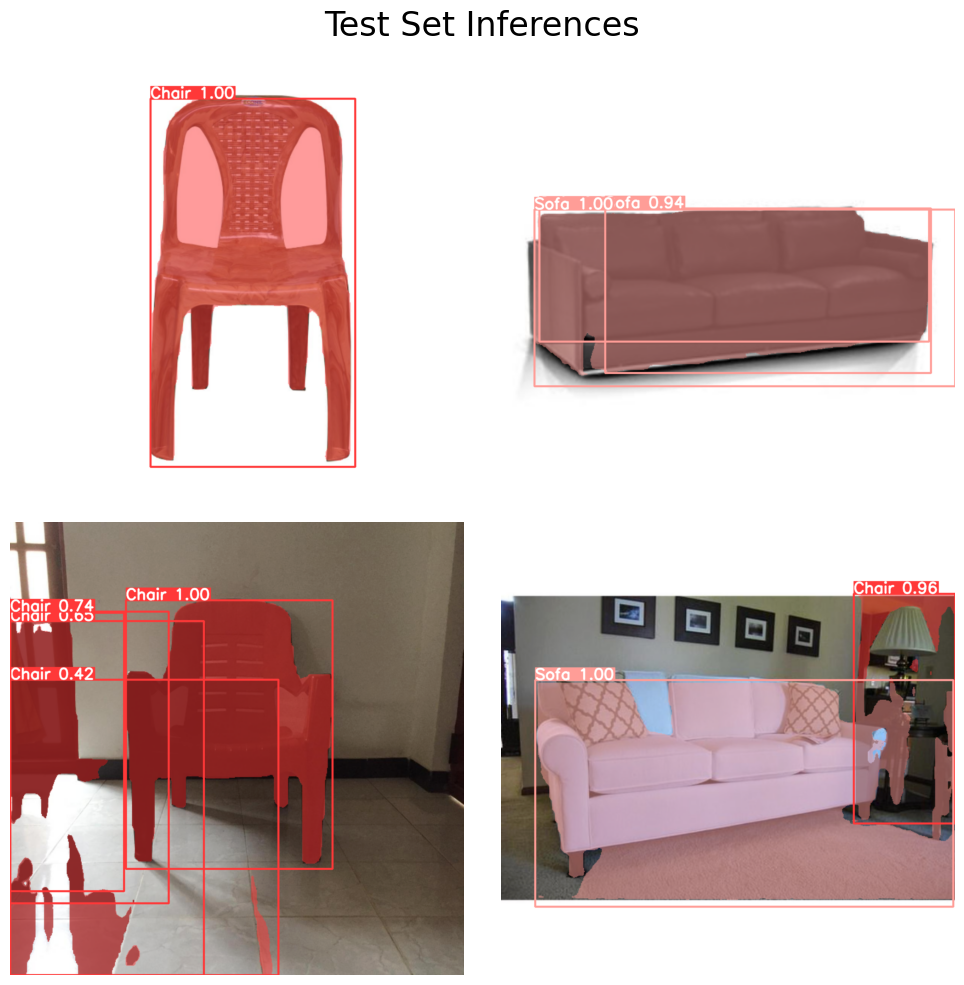

In [ ]:
# Define the path to the validation images
valid_images_path = os.path.join(dataDir, 'test', 'images')

# List all jpg images in the directory
image_files = [file for file in os.listdir(valid_images_path) if file.endswith('.jpg')]

# Select images at equal intervals
num_images = len(image_files)
selected_images = [image_files[i] for i in range(0, num_images, num_images // 4)]

# Initialize the subplot
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle('Test Set Inferences', fontsize=24)

# Perform inference on each selected image and display it
for i, ax in enumerate(axes.flatten()):
    image_path = os.path.join(valid_images_path, selected_images[i])
    results = best_model.predict(source=image_path, imgsz=640)
    annotated_image = results[0].plot()
    annotated_image_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
    ax.imshow(annotated_image_rgb)
    ax.axis('off')

plt.tight_layout()
plt.show()